In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Technology'
industry_list = all_industries[sector]

In [5]:
print(industry_list)

['Application Software', 'Business Software & Services', 'Communication Equipment', 'Computer Based Systems', 'Computer Distribution', 'Computer Hardware', 'Computer Peripherals', 'Computer Systems', 'Consumer Electronics', 'Contract Manufacturers', 'Data Storage', 'Data Storage Devices', 'Diversified Communication Services', 'Diversified Computer Systems', 'Diversified Electronics', 'Electronic Components', 'Electronic Gaming & Multimedia', 'Electronics & Computer Distribution', 'Electronics Distribution', 'Health Information Services', 'Healthcare Information Services', 'Information & Delivery Services', 'Information Technology Services', 'Internet Content & Information', 'Internet Information Providers', 'Internet Service Providers', 'Internet Software & Services', 'Long Distance Carriers', 'Multimedia & Graphics Software', 'Networking & Communication Devices', 'Personal Computers', 'Printed Circuit Boards', 'Processing Systems & Products', 'Scientific & Technical Instruments', 'Sec

In [6]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': []}
{'data': []}
{'data': [{'code': 'MSI', 'name': 'Motorola Solutions Inc', 'last_day_data_date': '2024-06-18', 'adjusted_close': 383.6, 'refund_1d': 0.78, 'refund_1d_p': 0.2, 'refund_5d': 7.6805, 'refund_5d_p': 2.04, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 63849402368, 'earnings_share': 8.07, 'dividend_yield': 0.0104, 'sector': 'Technology', 'industry': 'Communication Equipment', 'avgvol_1d': 597682, 'avgvol_200d': 657908.91}, {'code': 'HPE', 'name': 'Hewlett Packard Enterprise Co', 'last_day_data_date': '2024-06-18', 'adjusted_close': 21.84, 'refund_1d': 0.31, 'refund_1d_p': 1.44, 'refund_5d': 1.4034, 'refund_5d_p': 6.87, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 28912070656, 'earnings_share': 1.37, 'dividend_yield': 0.024, 'sector': 'Technology', 'industry': 'Communication Equipment', 'avgvol_1d': 44236394, 'avgvol_200d': 13653043.24}, {'code': 'NOK', 'name': 'Nokia Corp ADR', 'last_day_data_date': '2024-06-18', 'adjusted

In [7]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

MSI
HPE
NOK
JNPR
UI
CIEN
BDC
KN
SATX
BKTI
MITQ
SYNX
ANET
DELL
HPQ
PSTG
IONQ
DDD
QBTS
DM
MKFG
VLD
SGE
UAVS
SONY
LPL
VZIO
ZEPP
MSN
APH
TEL
GLW
JBL
FN
CLS
ROG
CTS
BHE
OUST
MEI
WBX
MPTI
KULR
LGL
VIAO
RBLX
SKLZ
SNX
ARW
VEEV
SOLV
DOCS
EVH
TDOC
PHR
WEAV
MPLN
AMWL
OWLT
FOXO
ACN
IBM
FI
INFY
FIS
IT
WIT
BR
GIB
LDOS
EPAM
CACI
PSN
GLOB
SAIC
KD
G
ASGN
CLVT
DXC
NABL
WNS
VYX
BBAI
UIS
NOTE
BTCM
WYY
CTM
SPOT
PINS
SNAP
TME
RDDT
TWLO
ATHM
YELP
GETY
SSTK
MAX
GENI
KIND
FVRR
PGRU
ZH
CMCM
BODI
SFUNY
ZDGE
FENG
AREN
GRMN
FTV
KEYS
TDY
COHR
VNT
ST
BMI
ESE
VPG
BKSY
KNW
ONTO
DQ
INTT
TRT
TSM
STM
ASX
UMC
WOLF
VSH
VLN
GCTS
MX
SQNS
CRM
SAP
NOW
UBER
SHOP
SNOW
FICO
HUBS
TYL
DT
ESTC
GWRE
YMM
PCOR
PAYC
DAY
U
SMAR
CWAN
BILL
ALIT
WK
PWSC
AI
INST
QTWO
ZETA
ENV
DV
GBTG
IBTA
ASAN
YOU
RNG
CXM
LSPD
PD
SEMR
GRND
PAR
MLNK
NATL
ETWO
PRO
VTEX
MODN
RSKD
FSLY
ML
ENFN
YALA
OLO
HKD
BLND
SMWB
SMRT
EB
XPER
LAW
NRDY
TRAK
FRGE
OOMA
ONTF
CCRD
PSQH
MRT
DHX
DPSI
OCFT
INUV
ISDR
BMTX
INLX
GETR
MTBLY
RBT
SGN
RYDE
RBTC
ORCL
PLTR
SQ
NET
CPAY
GDDY
IO

In [10]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [11]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [12]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [13]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [14]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [15]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [16]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
lack_finan_cout = 0
price_cout = 0
FCF_cout = 0
Dividend_cout = 0
EPS_cout = 0
EBITDA_cout = 0
Debt_cout = 0
Shares_cout = 0
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        price_cout += 1
        continue
    try:
        financial = stock['Financials']
    except Exception as e:
        print(f"{code} no Financial data provided: {e}")
        lack_finan_cout += 1
        continue

    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            Debt_cout += 1
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        Debt_cout += 1
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            EBITDA_cout += 1
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        EBITDA_cout += 1
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            FCF_cout += 1
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        FCF_cout += 1
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        Shares_cout += 1
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        Shares_cout += 1
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            EPS_cout += 1
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        EPS_cout += 1
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        EBITDA_cout += 1
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        EPS_cout += 1
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            Dividend_cout += 1
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        price_cout += 1
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


SATX has no Dividend Paid
BKTI has no Dividend Paid
MITQ has no Dividend Paid
SYNX EBITDA Zero error
ANET has no Dividend Paid
IONQ has no debt data in database
DDD has no Dividend Paid
QBTS has no Dividend Paid
MKFG has no debt data in database
VLD has no Dividend Paid
SGE has no Dividend Paid
VZIO has no debt data in database
ZEPP has no Dividend Paid
MSN has no debt data in database
FN has no debt data in database
OUST has no Dividend Paid
WBX has no Dividend Paid
MPTI has no Dividend Paid
LGL has no debt data in database
VIAO EPS Zero error
RBLX has no Dividend Paid
SKLZ has no Dividend Paid
VEEV has no Dividend Paid
SOLV EPS Zero error
DOCS has no debt data in database
TDOC has no Dividend Paid
WEAV has no Dividend Paid
MPLN has no Dividend Paid
AMWL has no debt data in database
OWLT has no Dividend Paid
FOXO has no Dividend Paid
KD has no Dividend Paid
UIS has no Dividend Paid
NOTE has no Dividend Paid
BTCM has no debt data in database
WYY has no debt data in database
PINS has no

In [17]:
print(f"Stocks with no Financial data provided:{lack_finan_cout}")
print(f"Stocks lack EPS data or EPS zero:{EPS_cout}")
print(f"Stocks lack price data:{price_cout}")
print(f"Stocks lack Debt data or Debt zero:{Debt_cout}")
print(f"Stocks lack shares data or shares zero:{Shares_cout}")
print(f"Stocks lack EBITDA data or EBITDA zero:{EBITDA_cout}")
print(f"Stocks pay zero dividend:{Dividend_cout}")
print(f"Stocks lack FCF data or FCF zero:{FCF_cout}")
print(f"total numer check {len(Codelist) + lack_finan_cout + price_cout + FCF_cout+ Debt_cout + EPS_cout + EBITDA_cout + Dividend_cout + Shares_cout}")

Stocks with no Financial data provided:0
Stocks lack EPS data or EPS zero:16
Stocks lack price data:13
Stocks lack Debt data or Debt zero:166
Stocks lack shares data or shares zero:52
Stocks lack EBITDA data or EBITDA zero:36
Stocks pay zero dividend:306
Stocks lack FCF data or FCF zero:3
total numer check 1057


In [18]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

465
465
465
465
465


In [19]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})
datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Technology.csv')

In [5]:
def drop_outliers_and_calculate_center(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    print(filtered_data.shape)
    max_value = filtered_data[column].max()
    min_value = filtered_data[column].min()
    
    mean_center = filtered_data[column].mean()
    median_center = filtered_data[column].median()
    
    return max_value, min_value, mean_center, median_center

In [6]:
[DebtMax, DebtMin, DebtMean, DebtMedian] = drop_outliers_and_calculate_center(df, 'Debt')
[DividendMax, DividendMin, DividendMean, DividendMedian] = drop_outliers_and_calculate_center(df, 'Dividend Yield')
[EPSMax, EPSMin, EPSMean, EPSMedian] = drop_outliers_and_calculate_center(df, 'EPS Yield')
[FCFMax, FCFMin, FCFMean, FCFMedian] = drop_outliers_and_calculate_center(df, 'FCF')
print(f"Max of the debt data of stocks is {DebtMax:.2f}, min is {DebtMin:.2f}, mean is {DebtMean:.2f} and median is {DebtMedian:.2f}")
print(f"Max of the Dividend Yield data of stocks is {DividendMax:.2f}, min is {DividendMin:.2f}, mean is {DividendMean:.2f} and median is {DividendMedian:.2f}")
print(f"Max of the EPS Yield data of stocks is {EPSMax:.2f}, min is {EPSMin:.2f}, mean is {EPSMean:.2f} and median is {EPSMedian:.2f}")
print(f"Max of the FCF Yield data of stocks is {FCFMax:.2f}, min is {FCFMin:.2f}, mean is {FCFMean:.2f} and median is {FCFMedian:.2f}")

(409, 5)
(381, 5)
(376, 5)
(357, 5)
Max of the debt data of stocks is 8.02, min is -4.82, mean is 1.51 and median is 0.84
Max of the Dividend Yield data of stocks is 0.14, min is 0.00, mean is 0.02 and median is 0.01
Max of the EPS Yield data of stocks is 0.17, min is -0.13, mean is 0.04 and median is 0.04
Max of the FCF Yield data of stocks is 0.18, min is -0.11, mean is 0.04 and median is 0.04


In [7]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(20,'Debt'))
top_50s.append(positive_df.nlargest(20,'Dividend Yield'))
top_50s.append(positive_df.nlargest(20,'EPS Yield'))
top_50s.append(positive_df.nlargest(20,'FCF'))
worst_100s.append(positive_df.nlargest(150, 'Debt'))
worst_100s.append(positive_df.nsmallest(150, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(150, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(150, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [8]:
print(final_selection.shape)
print(final_selection)

(19, 5)
     Code       Debt  Dividend Yield   EPS Yield         FCF
6    ITRN 0.00270092      0.02111278  0.09073027  0.11793314
7    NVEC 0.00452499      0.04492790  0.03975137  0.04236994
12   PERI 0.01131205      0.01470058  0.10676157  0.16783475
16   NTES 0.01604086      0.13658595  0.50162252  0.57070311
23   KSPI 0.20169617     21.71068270 24.18632551 27.35926195
27   IMOS 1.77050354      5.85055644  0.05888076  3.56163937
29    ASX 1.10511250      3.18847930  0.04185623  3.13825151
31   EEFT 2.15658729      2.45499849  0.07195488  0.11186667
32   MOMO 0.69389742      1.82959910  1.34487938  1.10311104
34   KARO 0.02895662      1.29507435  0.95171588  0.73534327
35   CINT 1.48132718      1.22259498  0.34866828  3.22576505
36   SONY 0.79522115      0.94255736  2.09738745 24.91485329
39    TSM 0.66884993      0.62667907  0.03878430  0.67749090
41    TME 0.84170517      0.01702625  0.35711387  0.42071654
46   IMMR 0.10945542      0.01899821  0.20365613  0.19836007
51    WIT 0.4783

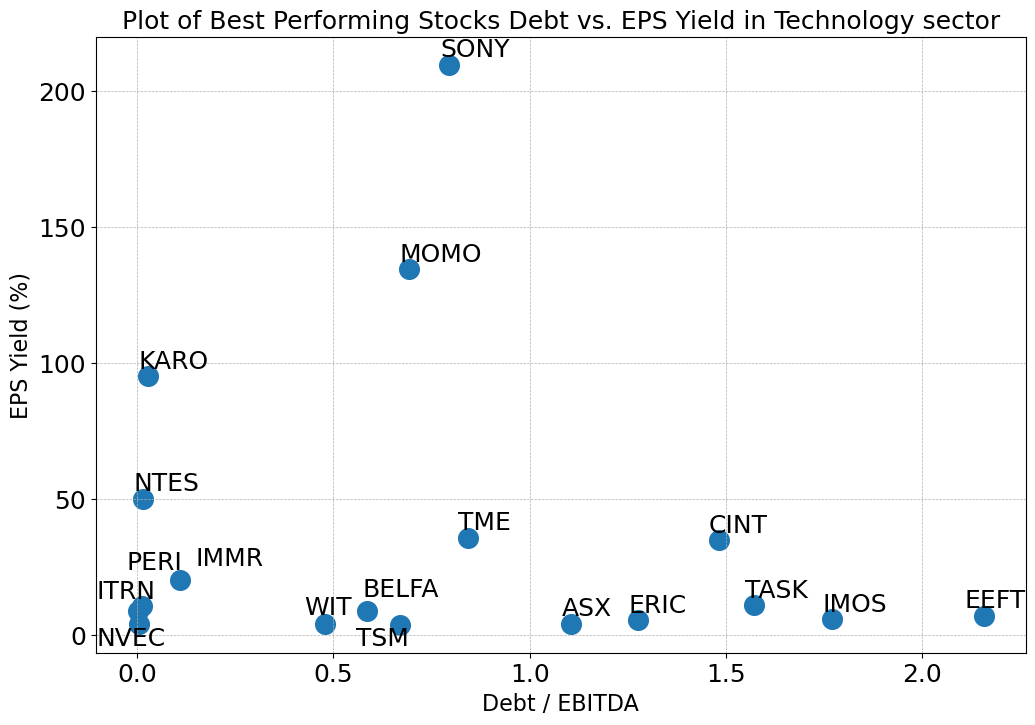

In [9]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield (%)',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

excluded_codes = ['KSPI']
plot_data_1 = final_selection[~final_selection['Code'].isin(excluded_codes)]
scatter = plt.scatter(plot_data_1['Debt'], plot_data_1['EPS Yield']*100, s=200) 

texts = []
for i, row in plot_data_1.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield']*100, row['Code'], fontsize=18, ha='right'))

adjust_text(texts)

sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

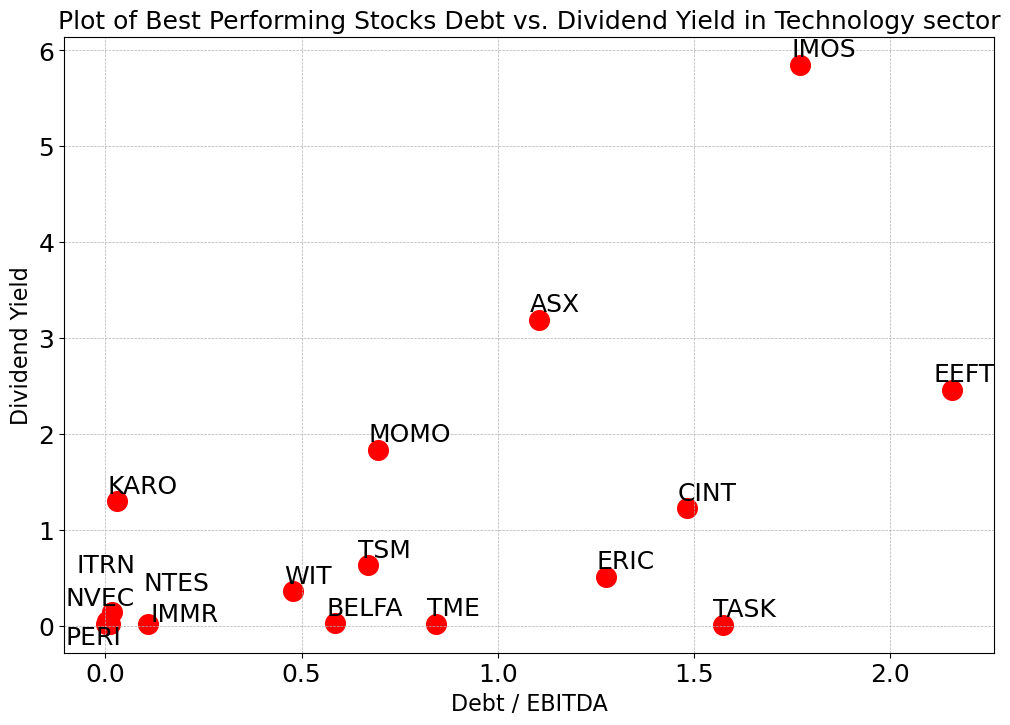

In [28]:
excluded_codes_1 = ['KSPI','SONY']
plot_data_2 = final_selection[~final_selection['Code'].isin(excluded_codes_1)]

plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

scatter = plt.scatter(plot_data_2['Debt'], plot_data_2['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data_2.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

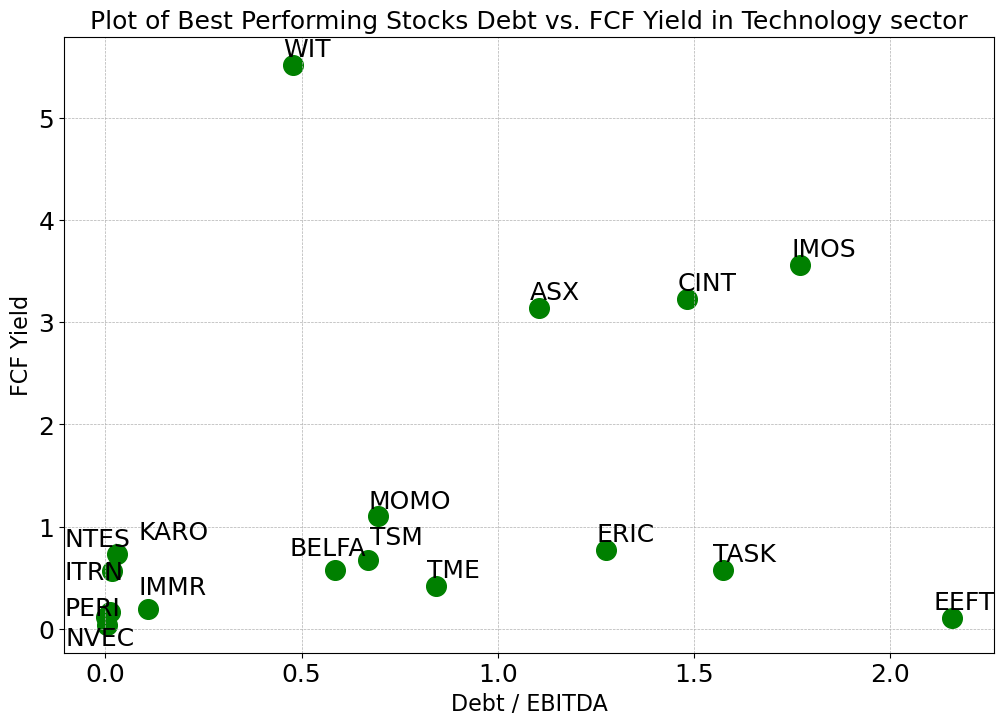

In [29]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data_2['Debt'], plot_data_2['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data_2.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [12]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-06'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [104]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [105]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


ITRN
NVEC
PERI
NTES
KSPI
IMOS
ASX
EEFT
MOMO
KARO
CINT
SONY
TSM
TME
IMMR
WIT
ERIC
TASK
BELFA


In [106]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} FCF error: {e}")
        continue


In [107]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2333297796764646]


In [108]:
all_returns.append(GSPC_returns)

In [109]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [110]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

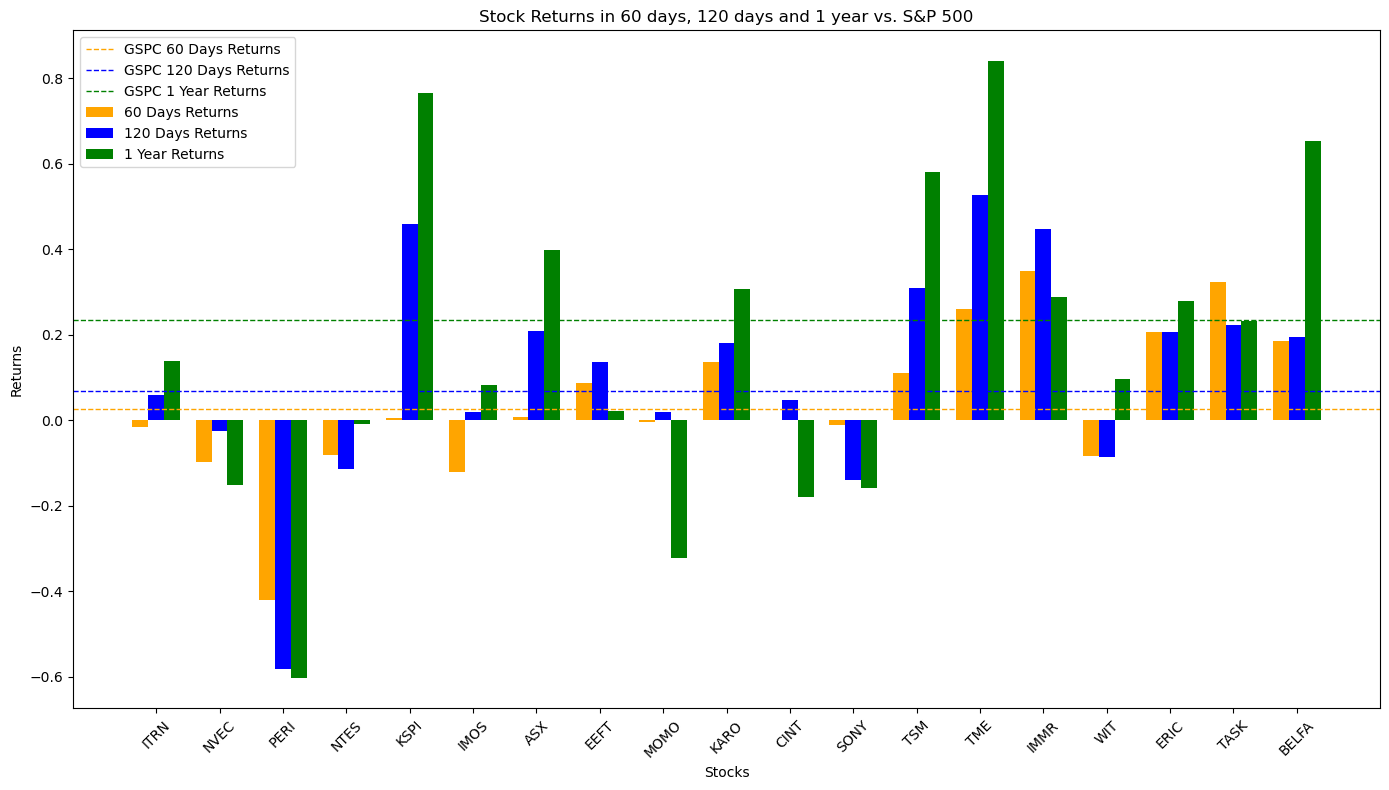

In [111]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns_.png')
plt.show()

In [112]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-9-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-9-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-9-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-9-Stocks Portfolios in 60 days is 4.42%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-9-Stocks Portfolios in 120 days is 10.96%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-9-Stocks Portfolios in 1 year is 17.13%
Return for Investing in S&P500 in 1 year is 23.33%


In [9]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

6      ITRN
7      NVEC
12     PERI
16     NTES
23     KSPI
27     IMOS
29      ASX
31     EEFT
32     MOMO
34     KARO
35     CINT
36     SONY
39      TSM
41      TME
46     IMMR
51      WIT
53     ERIC
54     TASK
55    BELFA
Name: Code, dtype: object


In [19]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

KSPI cannot get initial price
BELFA on 2023-10-02 error: list index out of range
[['BELFA', '2023-10-02']]
18


In [20]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[ 0.          0.05174866  0.0511039   0.02853071  0.04639423  0.0395759
  0.08837142  0.06544116  0.04261001  0.01815247 -0.00962878 -0.03157852
 -0.00561934  0.00801145 -0.01281608 -0.02775717 -0.03942422 -0.04627434
 -0.04971326 -0.04962398 -0.09541184 -0.08199179 -0.03826234 -0.03295369
  0.01173769 -0.00061564  0.00656065  0.02310038  0.05541917  0.07404077
  0.05864757  0.03804524  0.03972697  0.06969193  0.07885418  0.06205488
  0.11417083  0.08425278  0.07895593  0.10305721  0.11489659  0.10628302
  0.11708076  0.11202167  0.09373189  0.05422067  0.05214991  0.08708059
  0.10502947  0.11493493  0.16251893  0.16263208  0.16980349]


In [21]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [22]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Technology Sector is:  0.06179925557353684


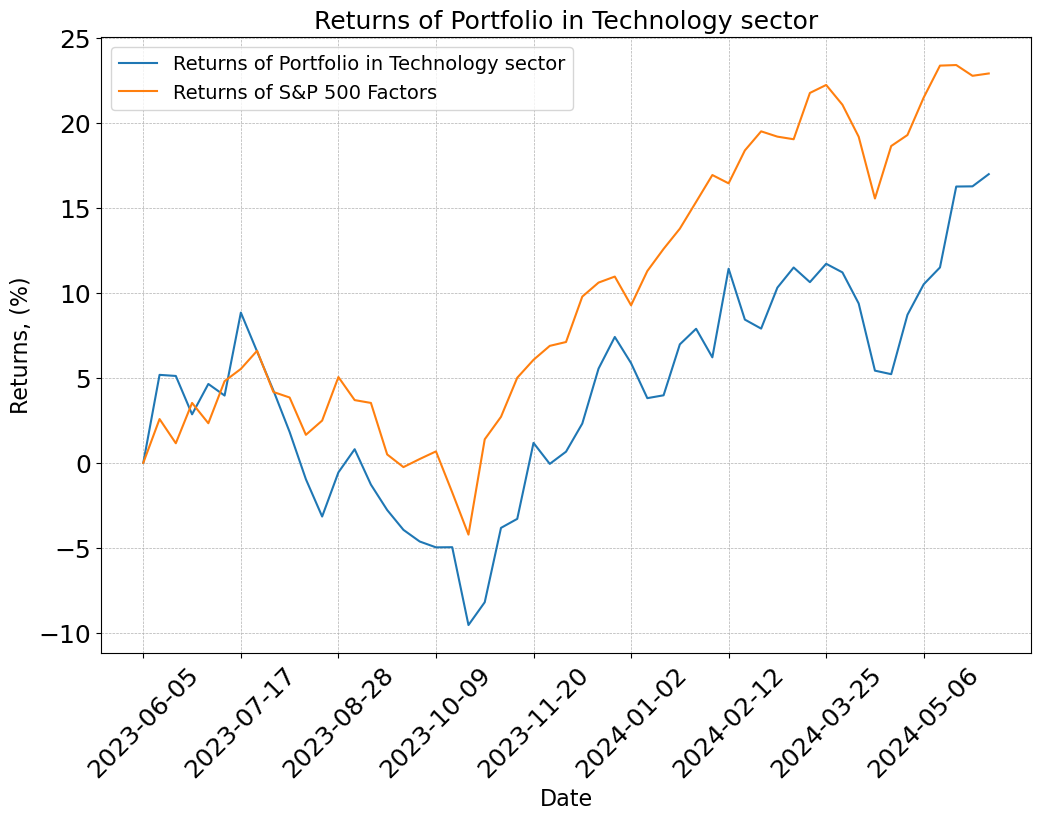

In [23]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()